In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ipywidgets import widgets
from IPython.display import display


Text(0.5,-0.1,'Kmax e-9 (s-1)')

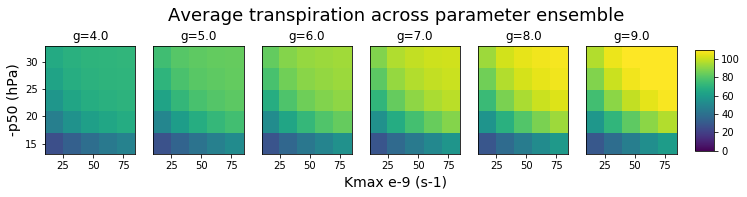

In [92]:
plt.rcParams['figure.figsize'] = (13,2)
data = np.loadtxt('full.txt')

kvals = np.unique(data[:,0])
pvals = np.unique(data[:,2])

fig,ax = plt.subplots(1,6)
for g in np.linspace(4,9,6):

    ix1 = data[:,1]==g

    k = 10
    p = 25

    out = np.zeros([6,6])

    for i in range(6):
        for j in range(6):
            ix=np.logical_and(ix1,np.logical_and(data[:,0]==kvals[i],data[:,2]==pvals[j]))
            out[i,j]=data[ix,3]

    ax = plt.subplot(1,6,g-3)   
    im = ax.pcolormesh(kvals,pvals,out,vmin=0,vmax=110)
    if g==4:
        ax.set_ylabel('-p50 (hPa)',fontsize=14)
    else:
        ax.set_yticks([])
    ax.set_title("g="+str(g))


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
        
        
fig.text(0.5, 1.05, 'Average transpiration across parameter ensemble', ha='center',fontsize=18)
fig.text(0.5, -0.1, 'Kmax e-9 (s-1)', ha='center',fontsize=14)






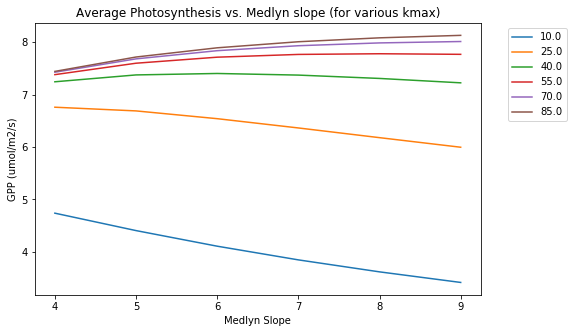

In [88]:
plt.rcParams['figure.figsize'] = (8,5)
data  = np.loadtxt('full.txt')

# look at psi50 = 25
# plot each kmax as a different line
# varying g
kvals = np.sort(np.unique(data[:,0]))
for k in kvals:

    ix1  = data[:,2]==25
    ix2  = data[:,0]==k

    ix   = np.logical_and(ix1,ix2)
    g    = data[ix,1]
    fpsn = data[ix,4]

    plt.plot(g,fpsn)
    plt.xlabel('Medlyn Slope')
    plt.ylabel('GPP (umol/m2/s)')
    plt.legend(kvals,bbox_to_anchor=(1.05, 1),loc=2)
    plt.title('Average Photosynthesis vs. Medlyn slope (for various kmax)')



In [89]:
data  = np.loadtxt('fctr.txt')
data2 = np.loadtxt('fpsn.txt')

In [90]:
def plot_ten(ten):
    t   = np.linspace(0.5,24,48)
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    for i in np.linspace(10,1,10):
        if sum(ten[int(i),:])>0:
            ix1 = data[:,0]>0
            ix2 = data[:,0]>0
            for j in range(3):
                ix1 = np.logical_and(ix1,data[:,j]==ten[int(i),j])
                ix2 = np.logical_and(ix2,data2[:,j]==ten[int(i),j])
            if sum(ix1)>0:
                out = data[ix1,3:]
                out2 = data2[ix2,3:]
                if i==1:
                    ax1.plot(t,np.transpose(out),'r')
                    ax2.plot(t,np.transpose(out2),'r')
                else:
                    ax1.plot(t,np.transpose(out),color=(0.8,0.7,0.7))
                    ax2.plot(t,np.transpose(out2),color=(0.8,0.7,0.7))
                ax1.set_ylim([0,500])
                ax1.set_xlabel('Hour')
                ax1.set_ylabel('Transpiration (W/m2)')
                ax1.set_xticks(np.linspace(0,24,5))
                ax2.set_ylim([0,25])
                ax2.set_xticks(np.linspace(0,24,5))
                ax2.set_xlabel('Hour')
                ax2.set_ylabel('GPP (umol/m2/s)')
                ax1.set_title('SON Average')
                ax2.set_title('SON Average')



In [91]:
def f(i,j,k):
    old_ten = ten
    ten[0,:]  = [i,j,k]
    ten[1:,:] = old_ten[0:10,:]
    plot_ten(ten)
    
ten = np.zeros([11,3])
w = widgets.interactive(f, i=(10,85,15),j=(4,9,1),k=(13,33,4))
display(w)

A Jupyter Widget